# Importación de librerias a manejar

In [1]:
import empiricaldist
#import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import warnings
from IPython.core.display import display, HTML
import math

#Quitar advertencias en los codigos
warnings.filterwarnings('ignore')

# Ver Datasets completos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.2f}'.format

C:\Users\javie\AppData\Local\Temp\ipykernel_15792\452621627.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Importación de datos | Conociendo datos

In [2]:
df_train = pd.read_csv('data\\train_data.csv') # Caracteristicas de los productos  recomendaciones y la indicación del usuario
df_test = pd.read_csv('data\\test_challengue.csv') # Test Prueba

In [3]:
# Entendiendo la composición de los datos

print("Train Cantidad tipo variables")
print("--------------------------------")
t_1= (
    df_train
    .dtypes
    .value_counts()
)
print(t_1)
print("Observaciones df_train {}:".format(str(df_train.shape)))
print("--------------------------------")
print("Test | Prueba")
t_2 = (
    df_test
    .dtypes
    .value_counts()
)
print("--------------------------------")
print(t_2)
print("--------------------------------")

print("Observaciones df_test {}:".format(str(df_test.shape)))

Train Cantidad tipo variables
--------------------------------
object     10
float64     8
int64       3
bool        1
dtype: int64
Observaciones df_train (60430, 22):
--------------------------------
Test | Prueba
--------------------------------
object     10
float64     8
int64       3
dtype: int64
--------------------------------
Observaciones df_test (6714, 21):


In [4]:
print("----------------------------------------------------")
print("Train Nombre Columnas")
print("----------------------------------------------------")
print(df_train.columns)
print("----------------------------------------------------")
print("Train Test")
print("----------------------------------------------------")
print(df_test.columns)

----------------------------------------------------
Train Nombre Columnas
----------------------------------------------------
Index(['Unnamed: 0', 'PRODUCT_ID', 'RECOMMENDED_PRODUCT_ID', 'USER_LIKED',
       'RECOMENDATION_INDEX_ORDER', 'RECOMMENDATION_APPROVED_BY_USER',
       'RECOMMENDATION_DONE_BY_RT', 'RECOMMENDATION_DONE_BY_USER',
       'PRODUCT_SALES', 'RECOMMENDED_PRODUCT_SALES', 'PRODUCT_CATEGORY_PATH',
       'RECOMMENDED_PRODUCT_CATEGORY_PATH', 'PRODUCT_NAME',
       'PRODUCT_LONG_DESCRIPTION', 'PRODUCT_TRADEMARK', 'PRODUCT_MAKER',
       'PRODUCT_LAST_PRICE_SOLD', 'RECOMMENDED_PRODUCT_NAME',
       'RECOMMENDED_PRODUCT_LONG_DESCRIPTION', 'RECOMMENDED_PRODUCT_TRADEMARK',
       'RECOMMENDED_PRODUCT_MAKER', 'RECOMMENDED_PRODUCT_LAST_PRICE_SOLD'],
      dtype='object')
----------------------------------------------------
Train Test
----------------------------------------------------
Index(['Unnamed: 0', 'PRODUCT_ID', 'RECOMMENDED_PRODUCT_ID',
       'RECOMENDATION_INDEX_OR

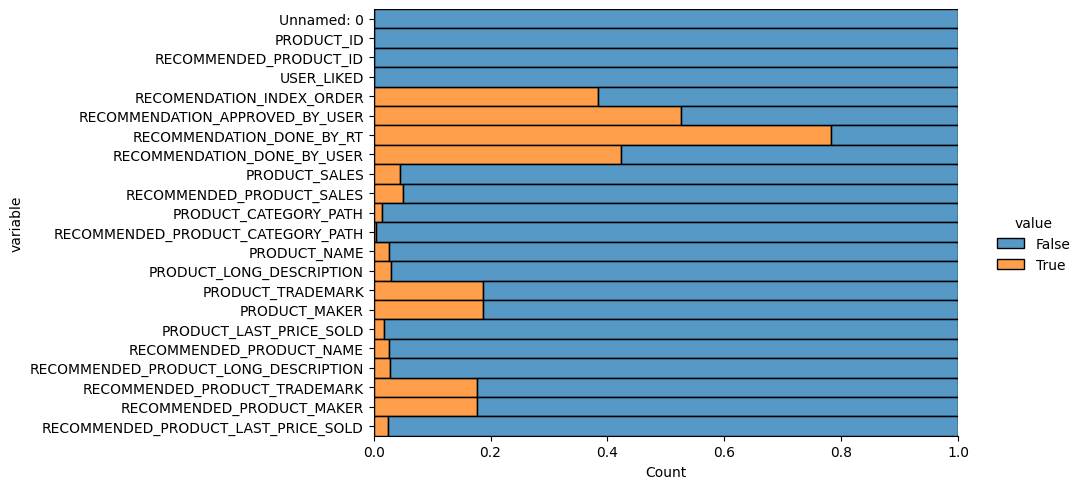

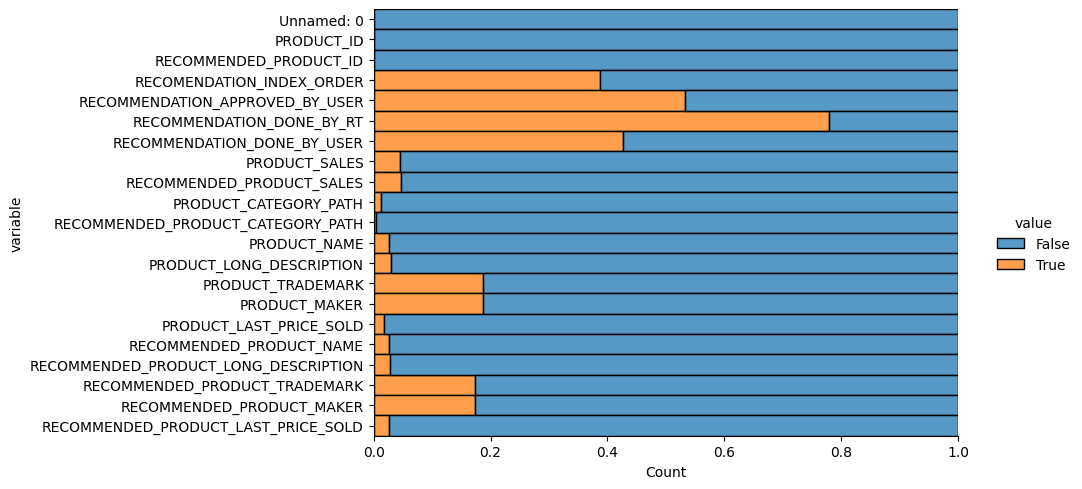

In [5]:
# Proporción de Nulos en los datos

(
    df_train
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y='variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

(
    df_test
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y='variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

# Análisis descriptivos

In [6]:
# df_test.astype({'PRODUCT_NAME':'category',
#                 'PRODUCT_TRADEMARK':'category',
#                 'PRODUCT_MAKER':'category',
#                 'RECOMMENDED_PRODUCT_NAME':'category',
#                 'RECOMMENDED_PRODUCT_TRADEMARK':'category',
#                 'RECOMMENDED_PRODUCT_MAKER':'category'}). describe(include='category')

df_train.astype({'PRODUCT_NAME':'category',
                'RECOMMENDED_PRODUCT_NAME':'category',
                'USER_LIKED':'category',
                'PRODUCT_ID':'category',
                'RECOMMENDED_PRODUCT_ID':'category',
                'PRODUCT_CATEGORY_PATH':'category',
                'RECOMMENDED_PRODUCT_CATEGORY_PATH':'category'}). describe(include='category')


,PRODUCT_ID,RECOMMENDED_PRODUCT_ID,USER_LIKED,PRODUCT_CATEGORY_PATH,RECOMMENDED_PRODUCT_CATEGORY_PATH,PRODUCT_NAME,RECOMMENDED_PRODUCT_NAME
count,60430,60430,60430,59559,60226,58853,58872
unique,36067,35015,2,448,457,19138,17564
top,975228494,976326462,True,category-tree-co/despensa-y-productos-secos/sn...,category-tree-co/despensa-y-productos-secos/sn...,Takis Frituras Sabor Fuego,Takis Frituras Sabor Fuego
freq,23,28,54174,4465,4607,134,112


In [7]:
df_train_b = pd.DataFrame(df_train.groupby(['PRODUCT_ID','PRODUCT_NAME','PRODUCT_TRADEMARK','PRODUCT_MAKER','PRODUCT_CATEGORY_PATH']).size()).reset_index()
df_train_b[df_train_b['PRODUCT_ID'].astype(str).str.contains("975228494")]

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_TRADEMARK,PRODUCT_MAKER,PRODUCT_CATEGORY_PATH,0
6915,975228494,Magnum Paleta Almendras,Magnum,Unilever,category-tree-co/comida-preparada/helados-y-po...,23


In [8]:
df_train_b = pd.DataFrame(df_train.groupby(['RECOMMENDED_PRODUCT_ID','RECOMMENDED_PRODUCT_NAME','RECOMMENDED_PRODUCT_TRADEMARK','RECOMMENDED_PRODUCT_MAKER','RECOMMENDED_PRODUCT_CATEGORY_PATH']).size()).reset_index()
df_train_b[df_train_b['RECOMMENDED_PRODUCT_ID'].astype(str).str.contains("976326462")]

,RECOMMENDED_PRODUCT_ID,RECOMMENDED_PRODUCT_NAME,RECOMMENDED_PRODUCT_TRADEMARK,RECOMMENDED_PRODUCT_MAKER,RECOMMENDED_PRODUCT_CATEGORY_PATH,0
12815,976326462,Sabritas-Cheetos Snack Flaming Hot,Sabritas-Cheetos,PepsiCo,category-tree-co/despensa-y-productos-secos/sn...,28


## Descripción Categórica
- De los 60430 registros contamos con 58853 registros con nombre.
- Se cuenta con, 36067 Valores únicos de producto, los cuales se han recomendado 35015, es decir que por cada producto que se hace recomendación, se recomienda 1 producto aproximadamente
- El producto para el cual se hacen más recomendaciones es ***Magnum Paleta Almendras***
- el producto que se recomienda más con la venta de otro PRODUCT_ID es ***Sabritas-Cheetos Snack Flaming Hot****
- el porcentaje de gusto de las recomendaciones dadas es positivo, este porcentaje se distribuye en 0,89 con Gusto positivo y un 0.11 que no gusta de la recomendación

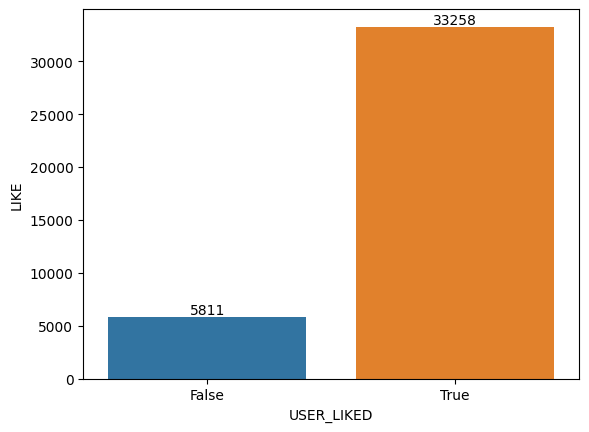

In [9]:
df_pro = df_train.groupby(['USER_LIKED',] \
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'LIKE': len(x['PRODUCT_ID'].unique())
                                }))
df_pro= df_pro.reset_index()

ax = sns.barplot(
        data=df_pro,
        x='USER_LIKED',
        y='LIKE'
    )

for i in ax.containers:
    ax.bar_label(i,)

# Distribución de productos A (Producto comprado (Al que se le hizo la recomendación)) B(Producto recomendado)

![kernelspec](capturas/Captura%20de%20pantalla%202022-10-12%20143500.png)

----------------------------------------------------------------


----------------------------------------------------------------
    Cantidad Producto recomendacion (A)  Producto Recomendado(B)
0                                     4                       23
1                                     2                       21
2                                     3                       20
3                                     2                       19
4                                     4                       18
5                                     4                       17
6                                     4                       16
7                                     8                       15
8                                    11                       14
9                                    17                       13
10                                   27                       12
11                                   41                       11
12                                   40                       10
13                       

----------------------------------------------------------------
PROMEDIO: 1.6754928327834309
MEDIANA: 1.0
MODA: 0    1
Name: #_PRODUC_RECOME, dtype: int64
----------------------------------------------------------------


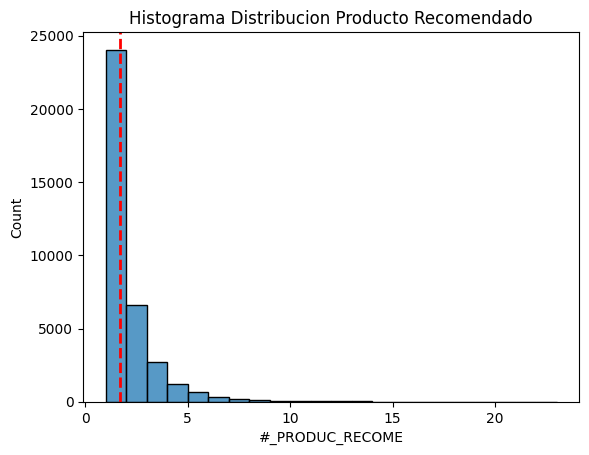

In [10]:
df_train_hist = df_train.groupby(['PRODUCT_ID',] \
        ).apply(lambda x: pd.Series( \
                                    { \
                                    '#_PRODUC_RECOME': len(x['RECOMMENDED_PRODUCT_ID'].unique())
                                }))
df_train_hist= df_train_hist.reset_index()

#Distribucion de las recomendaciones
sns.histplot(
    data=df_train_hist ,
    x='#_PRODUC_RECOME',
    binwidth=1
).set_title('Histograma Distribucion Producto Recomendado')

plt.axvline(
    x = df_train_hist['#_PRODUC_RECOME'].mean(),
    color='red',
    linestyle = 'dashed',
    linewidth = 2
)

print('----------------------------------------------------------------')
display(HTML('<h1>Cantidad de productos que tienen más de una recomendación!</h1>'))
print('----------------------------------------------------------------')
df_train_hist_l = df_train_hist['#_PRODUC_RECOME'].value_counts().reset_index()
df_train_hist_l = df_train_hist_l.rename(columns = {'#_PRODUC_RECOME':'Cantidad Producto recomendacion (A)','index': 'Producto Recomendado(B)'})
df_train_hist_l = df_train_hist_l.reindex(columns = ['Cantidad Producto recomendacion (A)','Producto Recomendado(B)'])
print(df_train_hist_l.sort_values(by=['Producto Recomendado(B)'], ascending=False).reset_index(drop=True))
print('----------------------------------------------------------------')
display(HTML('<h1>Medidas de tendencia central</h1>'))
print('----------------------------------------------------------------')
print("PROMEDIO: {}".format(df_train_hist['#_PRODUC_RECOME'].mean()))
print("MEDIANA: {}".format(df_train_hist['#_PRODUC_RECOME'].median()))
print("MODA: {}".format(df_train_hist['#_PRODUC_RECOME'].mode()))
print('----------------------------------------------------------------')


# Armar un clasificador que indique si un producto es una buena recomendación similar para otro.

In [11]:
df_train_prob = df_train.groupby(['RECOMMENDED_PRODUCT_ID','RECOMMENDED_PRODUCT_NAME','USER_LIKED'] \
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'RECOMMENDED_PRODUCT_CATEGORY_PATH': x['RECOMMENDED_PRODUCT_CATEGORY_PATH'].unique(),
                                    'CANTIDAD': len(x['PRODUCT_ID'].unique()),
                                    'PRODUCT_ID': sorted(x['PRODUCT_ID'].unique()),
                                    #'PRODUCT_NAME': x['PRODUCT_NAME'].unique(),
                                    'PRODUCT_CATEGORY_PATH': x['PRODUCT_CATEGORY_PATH'].unique(),
                                    'IGUAL_CATEGORIA': x['PRODUCT_CATEGORY_PATH'].unique() == x['RECOMMENDED_PRODUCT_CATEGORY_PATH'].unique()
                                }))
df_train_prob = df_train_prob.reset_index()
df_train_prob = df_train_prob.explode('IGUAL_CATEGORIA')

In [12]:
df_train_prob['USER_LIKED'].unique()

probabilidad_recomendacion = (
    df_train_prob
    .assign(is_liked = lambda df : df['USER_LIKED'].replace(['True',
    'False'],[1,0]))
)
probabilidad_recomendacion['is_liked'] = probabilidad_recomendacion['is_liked'].astype(int)
# probabilidad_recomendacion['RECOMMENDED_PRODUCT_ID'] = probabilidad_recomendacion['RECOMMENDED_PRODUCT_ID'].astype(str)
probabilidad_recomendacion.sample(frac= 0.00008)

,RECOMMENDED_PRODUCT_ID,RECOMMENDED_PRODUCT_NAME,USER_LIKED,RECOMMENDED_PRODUCT_CATEGORY_PATH,CANTIDAD,PRODUCT_ID,PRODUCT_CATEGORY_PATH,IGUAL_CATEGORIA,is_liked
12714,975463171,Broncolín Etiqueta Verde Jarabe Oral,True,[category-tree-co/farmacia/gripa-y-tos/tos],1,[975463182],[category-tree-co/comida-fresca/quesos/quesos-...,False,1
10780,975333631,Altea Pimenton,True,[category-tree-co/despensa-y-productos-secos/c...,1,[979236685],[category-tree-co/despensa-y-productos-secos/c...,True,1
7789,975205993,Blumen Jabon Líquido Para Manos,True,[category-tree-co/cuidado-personal/jabones-y-l...,1,[975217176],[category-tree-co/cuidado-personal/jabones-y-l...,True,1


#### Probabilidad de cada producto segun la recomendación dada
La probabilidad de cualquier tipo de evento — simple, compuesto, independiente, dependiente — siempre sigue la misma fórmula básica:

![1](capturas/Captura%20de%20pantalla%202022-10-12%20183656.png)

In [13]:
# probabilidad = empiricaldist.Cdf.from_seq(
#     probabilidad_recomendacion['RECOMMENDED_PRODUCT_ID'],
#     normalize=True
# )
# probabilidad = probabilidad.reset_index(name='PROB')
# probabilidad = probabilidad.rename(columns = {'index':'RECOMMENDED_PRODUCT_ID_Y'})
# #probabilidad['acumulado'] = probabilidad['PROB'].diff()
# probabilidad.head(5)

probabilidad = probabilidad_recomendacion
probabilidad['PROB'] = 1 -  probabilidad['CANTIDAD']/probabilidad['CANTIDAD'].nunique()
q_probabilidad = pd.DataFrame(probabilidad['PROB'].value_counts()).reset_index()
q_probabilidad = q_probabilidad.rename(columns = {'PROB':'Cantidad Producto Recomendado','index': 'PROB'})
q_probabilidad.sort_values(by=['PROB'], ascending=False).reset_index(drop=True)


,PROB,Cantidad Producto Recomendado
0,0.96,25605
1,0.91,7426
2,0.87,3268
3,0.83,1637
4,0.78,858
5,0.74,477
6,0.70,294
7,0.65,207
8,0.61,131
9,0.57,92


# Rango límites del 65 % de los datos

Con este rango ya nos aseguramos que estamos capturando el 65% de nuestros datos 

In [14]:
#superior
superior =probabilidad['PROB'].mean() +probabilidad['PROB'].std()

inferior = probabilidad['PROB'].mean() -probabilidad['PROB'].std()

print(superior,inferior)

0.9955902471468407 0.8452229907459692


In [15]:
probabilidad.sample(frac=0.00008)

,RECOMMENDED_PRODUCT_ID,RECOMMENDED_PRODUCT_NAME,USER_LIKED,RECOMMENDED_PRODUCT_CATEGORY_PATH,CANTIDAD,PRODUCT_ID,PRODUCT_CATEGORY_PATH,IGUAL_CATEGORIA,is_liked,PROB
199,975051559,Mc Cormick Canela Molida,True,[category-tree-co/despensa-y-productos-secos/c...,2,"[979238525, 1563333820]",[category-tree-co/despensa-y-productos-secos/c...,True,1,0.91
31782,981014024,Great Value Duraznos Mitades En Almíbar 820 G,False,[category-tree-co/despensa-y-productos-secos/c...,1,[981003577],[category-tree-co/despensa-y-productos-secos/c...,True,0,0.96
19646,977146977,Tempra Suspensión Pediátrica en Gotas,True,[category-tree-co/farmacia/alivio-del-dolor/an...,2,"[977146920, 977147002]",[category-tree-co/farmacia/alivio-del-dolor/an...,True,1,0.91


# Clasificador

Este clasificador toma las siguientes variables
- Rango de los límites de la cantidad de los datos del 65% ***PROB[0.99,0.84]***
- Si la categoría de la recomendación es igual al categoría del producto recomendado
- si al usuario le gusto o no la recomendación

In [16]:
probabilidad_final = probabilidad

def recomendacion(row):
    if row['PROB'] < 1 and row['PROB'] > 0.87 and row['IGUAL_CATEGORIA'] == False and row['is_liked'] == 0:
        return "1. No Es Buena Recomendacion"
    elif row['PROB'] < 1 and row['PROB'] > 0.87 and row['IGUAL_CATEGORIA'] == True and row['is_liked'] == 1:
        return "2. Recomendacion Aceptable"
    elif row['PROB'] < 0.87 and row['IGUAL_CATEGORIA'] == False :
        return "3. Recomendacion Buena"
    elif row['PROB'] < 0.87 and row['IGUAL_CATEGORIA'] == True :
        return "4. Excelente recomendacion"
    else:
        return"1. No Es Buena Recomendacion"

probabilidad_final['recomendacion'] = probabilidad_final.apply(recomendacion,axis=1)

In [17]:
probabilidad_final.sample(frac=0.00008)

,RECOMMENDED_PRODUCT_ID,RECOMMENDED_PRODUCT_NAME,USER_LIKED,RECOMMENDED_PRODUCT_CATEGORY_PATH,CANTIDAD,PRODUCT_ID,PRODUCT_CATEGORY_PATH,IGUAL_CATEGORIA,is_liked,PROB,recomendacion
23528,977709608,Bocanegra Cerveza Pilsner Botella,True,[category-tree-co/bebidas/cervezas-y-sidras/ce...,1,[977709609],[category-tree-co/bebidas/cervezas-y-sidras/ce...,True,1,0.96,2. Recomendacion Aceptable
13398,975601508,San Miguel Elotitos Tiernos,True,[category-tree-co/despensa-y-productos-secos/c...,1,[975381002],[category-tree-co/despensa-y-productos-secos/c...,False,1,0.96,1. No Es Buena Recomendacion
36188,1563524619,Okko Galletas de Arroz y Quinoa Inflada Rellen...,False,[category-tree-co/despensa-y-productos-secos/s...,1,[977144976],[category-tree-co/despensa-y-productos-secos/s...,True,0,0.96,1. No Es Buena Recomendacion


## Realizamos un Explode a la tabla con la lista, la cual nos da un panorama más amplio del comportamiento de las recomendaciones

In [18]:
df_train_produc_id = pd.DataFrame(df_train.groupby(['PRODUCT_ID','PRODUCT_NAME']).size()).reset_index()
df_probabilidad = probabilidad_final.explode('PRODUCT_ID')
df_probabilidad.sample(frac=0.00008)

,RECOMMENDED_PRODUCT_ID,RECOMMENDED_PRODUCT_NAME,USER_LIKED,RECOMMENDED_PRODUCT_CATEGORY_PATH,CANTIDAD,PRODUCT_ID,PRODUCT_CATEGORY_PATH,IGUAL_CATEGORIA,is_liked,PROB,recomendacion
9152,975228189,Gansito Pastelito,True,[category-tree-co/despensa-y-productos-secos/p...,14,1563484749,[category-tree-co/despensa-y-productos-secos/p...,False,1,0.39,3. Recomendacion Buena
29527,981004546,Coronado cajeta quemada,True,[category-tree-co/despensa-y-productos-secos/m...,2,981004546,[category-tree-co/despensa-y-productos-secos/m...,True,1,0.91,2. Recomendacion Aceptable
30336,981007032,Cebolla Blanca,True,[category-tree-co/comida-fresca/frutas-y-verdu...,8,981006976,"[category-tree-co/bebidas/aguas/agua-natural, ...",True,1,0.65,4. Excelente recomendacion
9390,975228657,Sabritas-Receta Crujiente Papas Flamin Hot,True,[category-tree-co/despensa-y-productos-secos/s...,6,975228663,[category-tree-co/despensa-y-productos-secos/s...,True,1,0.74,4. Excelente recomendacion
10346,975307162,Sabritas-Kacang Cacahuates Flamin' Hot,True,[category-tree-co/despensa-y-productos-secos/s...,2,975121068,[category-tree-co/despensa-y-productos-secos/s...,True,1,0.91,2. Recomendacion Aceptable
9088,975228079,Caribe Cooler Tinto Bebida Alcohólica,True,[category-tree-co/bebidas/ready-to-drink/coolers],5,976486054,[category-tree-co/bebidas/ready-to-drink/coole...,True,1,0.78,4. Excelente recomendacion


# Tabla de combinaciones de probabilidad, con su recomendación para verificar más productos según lo que se asigne

In [19]:
df_train_produc_id = pd.DataFrame(df_train.groupby(['PRODUCT_ID','PRODUCT_NAME']).size()).reset_index()
df_train_produc_recomed_id = pd.DataFrame(df_train.groupby(['RECOMMENDED_PRODUCT_ID','RECOMMENDED_PRODUCT_NAME']).size()).reset_index()
df_probabilidad_prod = df_probabilidad.reindex(columns = ['PRODUCT_ID','RECOMMENDED_PRODUCT_ID','recomendacion'])

df_probabilidad_prod = df_probabilidad_prod.merge(df_train_produc_id, left_on=['PRODUCT_ID'],right_on=['PRODUCT_ID'], how='left')
df_probabilidad_prod = df_probabilidad_prod.merge(df_train_produc_recomed_id, left_on=['RECOMMENDED_PRODUCT_ID'],right_on=['RECOMMENDED_PRODUCT_ID'], how='left')
df_probabilidad_prod = df_probabilidad_prod.reindex(columns = ['recomendacion','PRODUCT_ID','PRODUCT_NAME','RECOMMENDED_PRODUCT_ID','RECOMMENDED_PRODUCT_NAME'])
df_probabilidad_prod.sample(frac= 0.0001)

,recomendacion,PRODUCT_ID,PRODUCT_NAME,RECOMMENDED_PRODUCT_ID,RECOMMENDED_PRODUCT_NAME
15312,3. Recomendacion Buena,975186560,Mr. Lucky Ensalada Orgánica,975203211,Ensalada Classic Romaine HEB
13512,2. Recomendacion Aceptable,976316956,Heinz Salsa Catsup,975183210,Heinz Tomato Ketchup
21943,2. Recomendacion Aceptable,975233749,Chile Serrano,975233747,Chile Jalapeño
22303,2. Recomendacion Aceptable,975276681,Columbus Salami Seco Italiano,975276345,Giuseppe Salami Estilo Genova
49719,4. Excelente recomendacion,977145561,Act II Il Palomitas Para Microondas,977554925,Crackis Palomitas Para Microondas
48245,2. Recomendacion Aceptable,977551522,Regio Luxury Papel Higiénico Blanco Almond Touch,977551533,Kleenex Cottonelle Papel Higiénico Beauty Arom...
69425,2. Recomendacion Aceptable,982499456,NaN,982499457,Mezclador Victoria Cubano Mixer


# Clasificador en toda la tabla

Se anexa el clasificador a toda la tabla de ***TF_TRAIN***

In [20]:
df_train_f_prob = df_train.merge(df_probabilidad_prod, left_on=['RECOMMENDED_PRODUCT_ID','PRODUCT_ID'],right_on=['RECOMMENDED_PRODUCT_ID','PRODUCT_ID'], how='left')
df_train_f_prob['recomendacion'] = df_train_f_prob['recomendacion'].fillna('1. No Es Buena Recomendacion')
df_train_f_prob.sample(frac=0.00008)

,Unnamed: 0,PRODUCT_ID,RECOMMENDED_PRODUCT_ID,USER_LIKED,RECOMENDATION_INDEX_ORDER,RECOMMENDATION_APPROVED_BY_USER,RECOMMENDATION_DONE_BY_RT,RECOMMENDATION_DONE_BY_USER,PRODUCT_SALES,RECOMMENDED_PRODUCT_SALES,PRODUCT_CATEGORY_PATH,RECOMMENDED_PRODUCT_CATEGORY_PATH,PRODUCT_NAME_x,PRODUCT_LONG_DESCRIPTION,PRODUCT_TRADEMARK,PRODUCT_MAKER,PRODUCT_LAST_PRICE_SOLD,RECOMMENDED_PRODUCT_NAME_x,RECOMMENDED_PRODUCT_LONG_DESCRIPTION,RECOMMENDED_PRODUCT_TRADEMARK,RECOMMENDED_PRODUCT_MAKER,RECOMMENDED_PRODUCT_LAST_PRICE_SOLD,recomendacion,PRODUCT_NAME_y,RECOMMENDED_PRODUCT_NAME_y
4833,64605,1563358071,1563326295,True,NaN,NaN,NaN,NaN,NaN,1.00,category-tree-co/bebidas/licores-y-aperitivos/...,category-tree-co/bebidas/licores-y-aperitivos/...,Absolut Vodka Original + Vasos,Absolut Vodka Original + Vasos 1 Und,Absolut,Pernod Ricard,313.00,Absolut Vodka Voices,Absolut Vodka Voices 750 mL,Absolut,Pernod Ricard,315.00,2. Recomendacion Aceptable,Absolut Vodka Original + Vasos,Absolut Vodka Voices
39040,18731,975778893,975228300,True,1.00,4.00,10.00,123.00,5.00,1721.00,category-tree-co/comida-preparada/helados-y-po...,category-tree-co/comida-preparada/helados-y-po...,Mordisko Paletas Holanda Chocopop,Disfruta de la deliciosa paleta de chocolate c...,Mordisko,Unilever,23.10,Mordisko Helados Clásicos Vainilla,"Sándwich de helado con grasa vegeta, con rico ...",Mordisko,Unilever,20.35,3. Recomendacion Buena,Mordisko Paletas Holanda Chocopop,Mordisko Helados Clásicos Vainilla
41864,60735,978629137,978564194,True,1.00,12.00,NaN,113.00,26.00,27.00,category-tree-co/mascotas/alimento-para-mascot...,category-tree-co/mascotas/alimento-para-mascot...,Cesar Alimento Para Perro Mini Fillets Pollo Y...,Alimento Para Perro Cesar Mini Fillets Pollo Y...,Cesar,Mars Incorporated,14.10,Cesar Alimento Para Perro Cordero Adulto Mini...,Alimento Para Perro Cesar Cordero Adulto Mini ...,Cesar,Mars Incorporated,14.10,1. No Es Buena Recomendacion,Cesar Alimento Para Perro Mini Fillets Pollo Y...,Cesar Alimento Para Perro Cordero Adulto Mini...
10094,2549,977693050,1563282339,True,NaN,NaN,NaN,NaN,17.00,49.00,category-tree-co/comida-fresca/quesos/otros-qu...,category-tree-co/comida-fresca/quesos/quesos-f...,Members Mark Quesos,Queso Panela,Panela,Panela,174.34,Los Volcanes Queso Panela,Sorprende a tu familia con la variedad de rece...,Los Volcanes,Grupo Lala,248.59,1. No Es Buena Recomendacion,Members Mark Quesos,Los Volcanes Queso Panela
29336,32450,975050573,975050573,True,NaN,NaN,NaN,NaN,57.00,57.00,category-tree-co/despensa-y-productos-secos/ce...,category-tree-co/despensa-y-productos-secos/ce...,Granvita Avena Integral En Hojuelas,"100% hojuelas de grano entero de avena, te pro...",Granvita,Grupo Industrial Vida,14.40,Granvita Avena Integral En Hojuelas,"100% hojuelas de grano entero de avena, te pro...",Granvita,Grupo Industrial Vida,14.40,4. Excelente recomendacion,Granvita Avena Integral En Hojuelas,Granvita Avena Integral En Hojuelas
37295,62326,975059175,975058682,False,1.00,3.00,NaN,NaN,24.00,1.00,category-tree-co/papelería-y-oficina/suministr...,category-tree-co/papelería-y-oficina/útiles-es...,Hojas Blancas Oficio Fergero Papel Bond 50 U,Hojas Blancas Oficio Fergero Papel Bond 50 U -...,NaN,NaN,44.90,Paper & Co Papel,Papel Impresion,NaN,NaN,55.00,1. No Es Buena Recomendacion,Hojas Blancas Oficio Fergero Papel Bond 50 U,Paper & Co Papel


#### Distribución de la recomendación para toda la tabla ***TRAIN***

                  recomendacion  PRODUCT_ID
0    4. Excelente recomendacion       11842
1        3. Recomendacion Buena        6211
2    2. Recomendacion Aceptable       21511
3  1. No Es Buena Recomendacion       12709


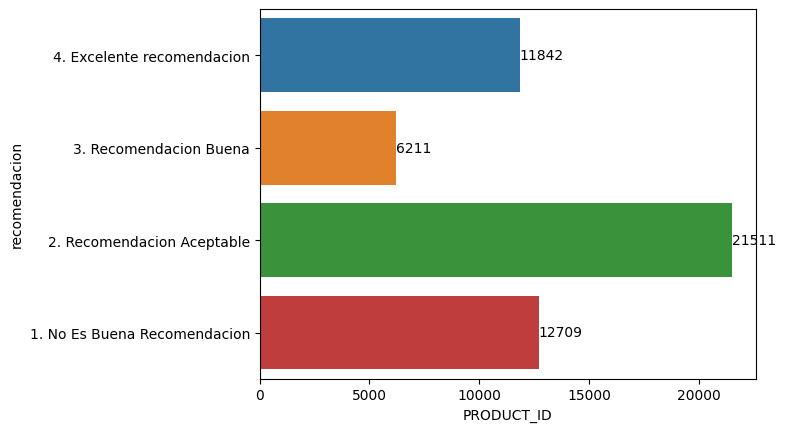

In [21]:
df_train_f_prob_distri = df_train_f_prob.groupby(['recomendacion'] \
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'PRODUCT_ID': len(x['PRODUCT_ID'].unique())
                                }))
distri_sns = pd.DataFrame(df_train_f_prob_distri.sort_values(by=['recomendacion'], ascending=False)).reset_index()
print(distri_sns)
ax = sns.barplot(x='PRODUCT_ID', y='recomendacion', data=distri_sns)
for i in ax.containers:
    ax.bar_label(i,)

# Ejemplo producto TOP (RECOMMENDED_PRODUCT_ID)

In [22]:
muestra_prob = df_train_f_prob[df_train_f_prob['RECOMMENDED_PRODUCT_ID'] == 975228494]
muestra_prob = muestra_prob.groupby(['recomendacion','PRODUCT_NAME_x']).agg({'RECOMMENDED_PRODUCT_ID':'count'})
muestra_prob = pd.DataFrame(muestra_prob).reset_index()
muestra_prob

,recomendacion,PRODUCT_NAME_x,RECOMMENDED_PRODUCT_ID
0,1. No Es Buena Recomendacion,Helados Holanda Helado Napolitano,2
1,4. Excelente recomendacion,Helados Holanda Helado Vainilla,1
2,4. Excelente recomendacion,Helados Nestlé Paleta Crunch,1
3,4. Excelente recomendacion,Magnum Paleta Doble Chocolate,1
4,4. Excelente recomendacion,Nesquik Paleta de Helado Sabor Chocolate,1


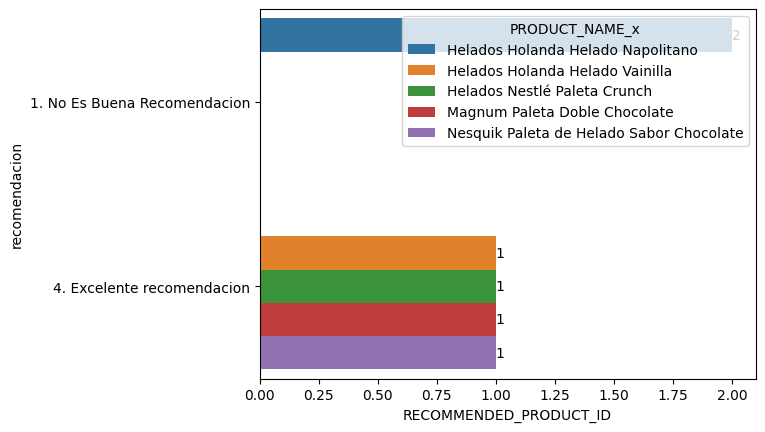

In [23]:
display(HTML('<h1>Clasificación de recomendación para el producto recomendado TOP!</h1>'))
ax = sns.barplot(x='RECOMMENDED_PRODUCT_ID', y='recomendacion',hue='PRODUCT_NAME_x', data=muestra_prob,capsize=5, width=.9)
for i in ax.containers:
    ax.bar_label(i,)

### No es lo mismo Product_id a Recomend_product_id, Cuando lo analizamos por separado son diferentes puntos de vista

# Ejemplo producto TOP (PRODUCT_ID)

In [24]:
df_train_f_prob_t = df_train_f_prob[df_train_f_prob['PRODUCT_ID'] == 975228494]
muestra_prob_2 = df_train_f_prob_t.groupby(['recomendacion','RECOMMENDED_PRODUCT_NAME_x']).agg({'PRODUCT_ID':'count'})
muestra_prob_2 = pd.DataFrame(muestra_prob_2).reset_index()
muestra_prob_2

,recomendacion,RECOMMENDED_PRODUCT_NAME_x,PRODUCT_ID
0,1. No Es Buena Recomendacion,Big Donuts Dona Coco 1 U,1
1,1. No Es Buena Recomendacion,Bimbo Donas Azucaradas,1
2,1. No Es Buena Recomendacion,Helados Holanda Helado Oreo,1
3,1. No Es Buena Recomendacion,Kit Kat Chocolate Clásico,1
4,1. No Es Buena Recomendacion,Kit Kat Paleta Helada Sabor Chocolate y Oblea,1
5,1. No Es Buena Recomendacion,Marinela-Chocoroles Pastelito Rellenos De Pina,2
6,1. No Es Buena Recomendacion,Skittles Caramelo Suave.,1
7,3. Recomendacion Buena,Bimbo Donas Azucaradas,8
8,3. Recomendacion Buena,Bimbo Donitas Espolvoreadas,3
9,3. Recomendacion Buena,Bimbo Panquecitos con Chispas Sabor a Chocolate,5


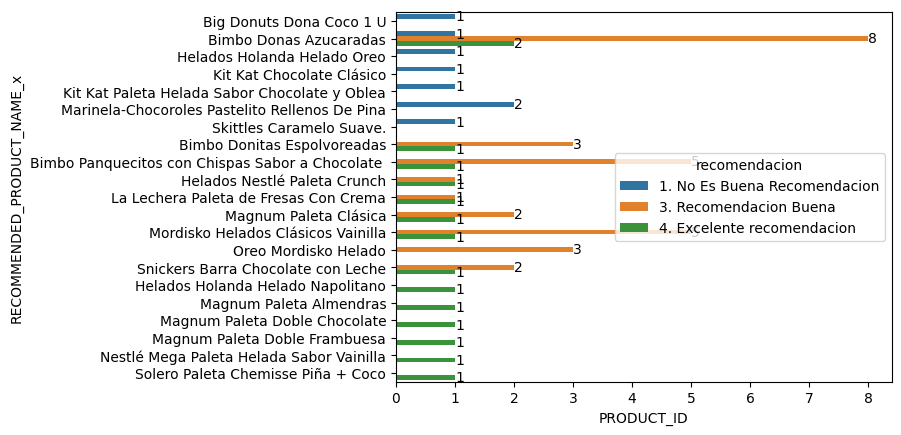

In [25]:
prueba_sns_2 = muestra_prob_2.groupby(['recomendacion','RECOMMENDED_PRODUCT_NAME_x']).agg({'PRODUCT_ID':'sum'})
prueba_sns_2 = pd.DataFrame(prueba_sns_2).reset_index()
prueba_sns_2

display(HTML('<h1>Clasificación de recomendación para el producto TOP!</h1>'))
ax = sns.barplot(x='PRODUCT_ID', y='RECOMMENDED_PRODUCT_NAME_x', hue='recomendacion', data=prueba_sns_2)

for i in ax.containers:
    ax.bar_label(i,)

# Predecir para test_challengue.csv

Ya que tenemos los nombres de las combinaciones realizaremos estas de acuerdo a los nombres

In [26]:
df_probabilidad_prod_test = df_probabilidad_prod
df_train_products = df_train.reindex(columns = ['PRODUCT_ID','PRODUCT_NAME','RECOMMENDED_PRODUCT_ID','RECOMMENDED_PRODUCT_NAME'])
df_train_products_prob = df_train_products.merge(df_probabilidad_prod_test, left_on=['PRODUCT_ID'], right_on=['PRODUCT_ID'], how='left')
df_test_f_prob = df_test.merge(df_train_products_prob, left_on=['PRODUCT_NAME','RECOMMENDED_PRODUCT_ID'],right_on=['PRODUCT_NAME_x','RECOMMENDED_PRODUCT_ID_y'], how='left')
df_test_f_prob['recomendacion'] = df_test_f_prob['recomendacion'].fillna('1. No Es Buena Recomendacion')

                  recomendacion  PRODUCT_ID
0  1. No Es Buena Recomendacion        6029
1    2. Recomendacion Aceptable          47
2        3. Recomendacion Buena          43
3    4. Excelente recomendacion          82


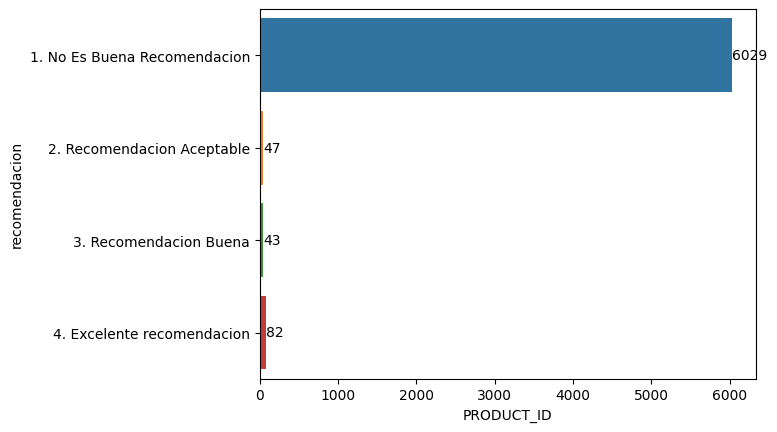

In [27]:
df_test_hist = df_test_f_prob.groupby(['recomendacion'] \
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'PRODUCT_ID': len(x['PRODUCT_ID_x'].unique())
                                }))
df_test_hist= df_test_hist.reset_index()
print(df_test_hist)

ax = sns.barplot(x='PRODUCT_ID', y='recomendacion', data=df_test_hist)
for i in ax.containers:
    ax.bar_label(i,)

## Predicción para tener mejores Combinaciones partir de la tabla Train

In [28]:
df_test_hist_ex = df_test_f_prob[df_test_f_prob['recomendacion'].str.contains('Excelente')]

df_test_hist_ex = df_test_f_prob.groupby(['PRODUCT_NAME','RECOMMENDED_PRODUCT_NAME'] \
        ).apply(lambda x: pd.Series( \
                                    { \
                                    'recomendacion': len(x['recomendacion'].unique())
                                }))
df_test_hist_ex= df_test_hist_ex.reset_index()
df_test_hist_ex.sample(frac=0.002)

,PRODUCT_NAME,RECOMMENDED_PRODUCT_NAME,recomendacion
3583,Marzetti Crutones De Ajo Y Mantequilla,Clemente Jacques Crutones Horneados Estilo Ita...,1
2213,Gelpharma Difenhidramina Antihistamínico (25 m...,Gelpharma Difenhidramina Antihistamínico (25 m...,1
1740,Electrolit Mora Azul,Electrolit Pediátrico Sabor a Uva,1
3477,Manzana Gala,Pera De Anjou,1
5974,Wonderful Pistaches,Wonderful Pistaches Sweet Chili 198 G,1
3624,Mc Cormick Mayonesa Light con Jugo de Limón,Mc Cormick Mayonesa con Jugo de Limones,1
2594,Holanda Paleta Chocomilk,Nesquik Paleta de Helado Sabor Chocolate,1
3395,Lunetas Chocolate,M&M ´S Dulce De Chocolate Con Leche,1
4136,Oral-B Cepillo Dental Clean,Cepillo Dental Limpieza Profunda,1
2435,Heb Salsa Bbq Dulce Con Miel,Hunts Salsa Bbq Original,1


# Predecir para test_challengue.csv

In [29]:
df_test_f_prob.to_csv('data/test_challengue_prob.csv')
df_test_f_prob.to_excel('data/test_challengue_prob.xlsx')